In [1]:
#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
import plotly.express as px
import sketch
import numpy as np
import pandas as pd
from io import StringIO
import requests

import warnings

In [2]:
# Loading dataset
df = pd.read_csv("loan.csv")
df.head()

/var/folders/4j/bdtxtzjn2q99blmmhhztcyth0000gn/T/ipykernel_14952/3261746476.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
df.id.count()

np.int64(39717)

In [6]:
nullV= df.isnull().sum()

In [7]:
nullV.sort_values(ascending=False).head(20)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
bc_open_to_buy               39717
avg_cur_bal                  39717
acc_open_past_24mths         39717
inq_last_12m                 39717
total_cu_tl                  39717
inq_fi                       39717
total_rev_hi_lim             39717
all_util                     39717
max_bal_bc                   39717
open_rv_24m                  39717
open_rv_12m                  39717
il_util                      39717
total_bal_il                 39717
mths_since_rcnt_il           39717
open_il_24m                  39717
dtype: int64

In [8]:
nullCol = np.array(nullV.loc[lambda x : x == 39717].index)

In [9]:
# Removed all Null Columns
df = df.drop(columns=nullCol)

In [10]:
df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [11]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [12]:
#df1 = df.to_csv("loan2.csv")

pymnt_plan	url	desc
title	zip_code	addr_state	dti	delinq_2yrs	earliest_cr_line	inq_last_6mths	mths_since_last_delinq	mths_since_last_record	open_acc	pub_rec	revol_bal	revol_util	total_acc	initial_list_status	out_prncp	out_prncp_inv	total_pymnt	total_pymnt_inv	total_rec_prncp	total_rec_int	total_rec_late_fee	recoveries	collection_recovery_fee	last_pymnt_d	last_pymnt_amnt	next_pymnt_d	last_credit_pull_d	collections_12_mths_ex_med	policy_code	application_type	acc_now_delinq	chargeoff_within_12_mths	delinq_amnt


In [13]:
nullCol2 = np.array(['pymnt_plan', 'url', 'desc', 'title', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt'])


In [14]:
df = df.drop(columns=nullCol2)

In [15]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0,0.0,0.0


In [16]:
df.shape

(39717, 48)

In [17]:
df.to_csv("loan4.csv")

In [18]:
df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
last_credit_pull_d                2
sub_grade                         0
recoveries                        0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
collection_recovery_fee           0
total_acc                         0
int_rate                          0
last_pymnt_amnt                   0
term                              0
funded_amnt_inv                   0
funded_amnt                       0
loan_amnt                   

In [19]:
df2 = pd.read_csv("loan4.csv")

/var/folders/4j/bdtxtzjn2q99blmmhhztcyth0000gn/T/ipykernel_14952/2028598937.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("loan4.csv")


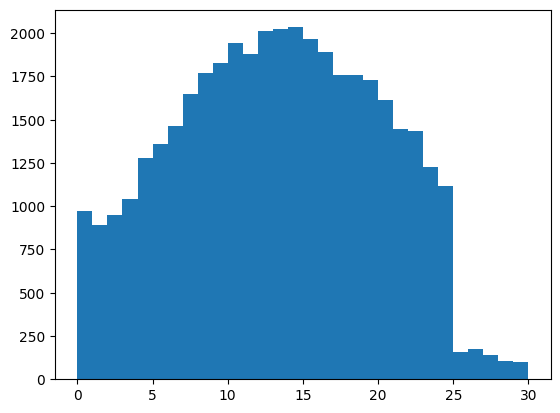

In [20]:
plt.hist(df2.dti, bins=30)
plt.show()

we can see in the above graph that there is a steep dropoff at 25 dti in the number of loans given, this means that the LendingClub does not give loans as freely to people who have DTI over 25 as under 25

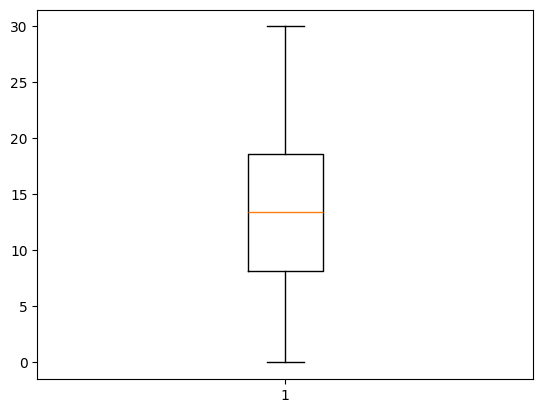

In [21]:
plt.boxplot(df2.dti)
plt.show()

In [22]:
ho_vals = df2.home_ownership.value_counts().values

In [23]:
ho_keys = np.array(df2.home_ownership.value_counts().index)

<BarContainer object of 5 artists>

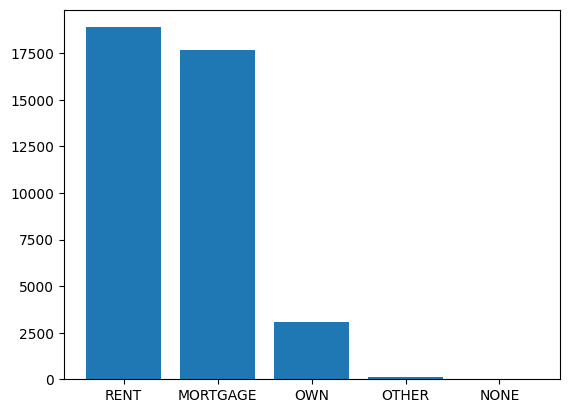

In [24]:
plt.bar(ho_keys, ho_vals)

<BarContainer object of 7 artists>

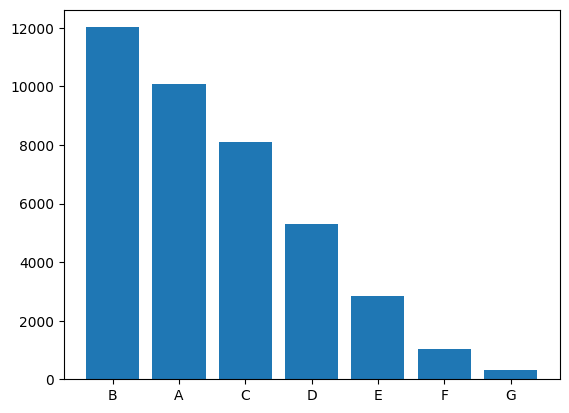

In [25]:
plt.bar(np.array(df2.grade.value_counts().index), df2.grade.value_counts().values)

In [26]:
df2.annual_inc.value_counts().loc[lambda x: x == 1]

annual_inc
24864.00     1
63834.24     1
67680.00     1
24756.00     1
182000.00    1
            ..
56820.00     1
45314.00     1
53913.00     1
62880.00     1
27376.00     1
Name: count, Length: 3963, dtype: int64

In [27]:
df3 = df2[df2.annual_inc < 4000.0]

In [28]:
df3.annual_inc.value_counts().loc[lambda x: x == 1]

Series([], Name: count, dtype: int64)

In [29]:
third_quartile = np.percentile(df2.annual_inc, 75)

In [30]:
first_quartile = np.percentile(df2.annual_inc, 25)

In [31]:
iqr = third_quartile - first_quartile # IQR

In [32]:
# upper fence
upper_fence = third_quartile + (1.5 * iqr)

In [33]:
lower_fence = first_quartile - (1.5 * iqr)

In [34]:
df3 = df2[df2.annual_inc < upper_fence]

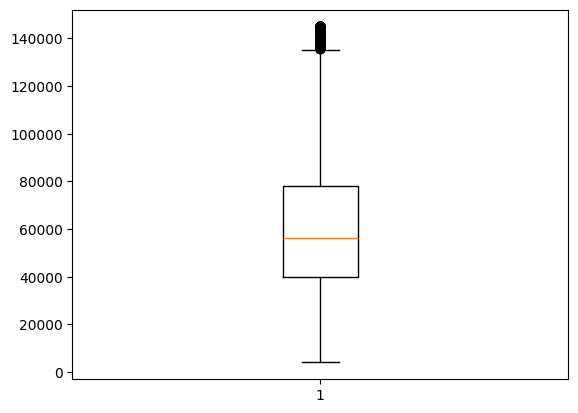

In [37]:
b = plt.boxplot(df3.annual_inc)
plt.show()

In [38]:
[i.get_ydata()[1] for i in b['whiskers']]

[np.float64(4000.0), np.float64(135000.0)]

(array([ 854., 4441., 7817., 8402., 5408., 4357., 2990., 1522., 1409.,
         674.]),
 array([  4000. ,  18100.8,  32201.6,  46302.4,  60403.2,  74504. ,
         88604.8, 102705.6, 116806.4, 130907.2, 145008. ]),
 <BarContainer object of 10 artists>)

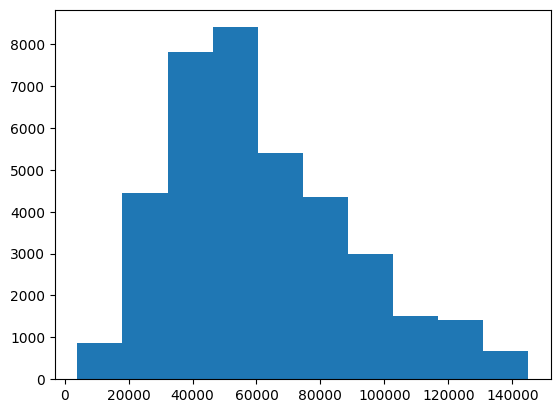

In [43]:
plt.hist(df3.annual_inc, bins=10)